(32561, 123)
(32561, 1)
(16281, 123)
(16281, 1)


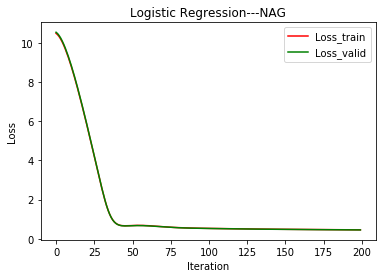

In [2]:
import random

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split


def get_data(file):
    data = load_svmlight_file(file)
    return data[0], data[1]

def sigmoid(inX):
    #print("X", inX)
    #print("W", W) 
    return 1.0 / (1 + np.exp(-inX))  

def prediction_y(X, W): 
    return sigmoid(np.dot(X, W))

def output(X, W):
    return sigmoid(X * W)

def compute_loss(X, W, y):
    no_samples = X.shape[0]
    hy = output(X, W)
    #print("multiply************", (np.multiply(y, np.log(hy))).shape)
    #print("(1 - y) * np.log(1 - hy)***********", ((1 - y) * np.log(1 - hy)).shape)
    
    loss = -1 * np.sum(np.multiply(y, np.log(hy)) + np.multiply((1 - y), np.log(1 - hy))) / no_samples
    return loss

#ploting the loss value
def plot(loss_train, loss_valid, title):
    plt.plot(loss_train, color="r", label="Loss_train")
    plt.plot(loss_valid, color="g",label="Loss_valid")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title(title)
    plt.legend()
    plt.show()

def SGD(iterate_number, W, X_train, y_train, x_test, y_test, learning_rate):
    loss_train = []
    loss_valid = []
    for i in range(iterate_number):
        random_index = int(random.uniform(0, N))
        #print("**********************************", random_index)
        #print(X_train[random_index].shape)
        #print(W.shape)
        #print("**********************************")
        h = output(X_train[random_index], W)
        error = h - y_train[random_index]
        W = W - learning_rate * (np.sum(error) * X_train[random_index].T)
        loss_train.append(compute_loss(X_train, W, y_train))
        loss_valid.append(compute_loss(x_test, W, y_test))
    return loss_train, loss_valid

def Adagrad(iterate_number, W, X_train, y_train, x_test, y_test, learning_rate):
    loss_train = []
    loss_valid = []
    gradient_array = []
    for i in range(iterate_number):
        random_index = int(random.uniform(0, N))
        h = output(X_train[random_index], W)
        error = h - y_train[random_index]
        gradient_temp = np.sum(error) * X_train[random_index].T
        if len(gradient_array) == 0:
            gradient_array.append(gradient_temp * gradient_temp)
        else:
            gradient_array.append(gradient_array[len - 1] + gradient_temp * gradient_temp)
        

        W = W - learning_rate * gradient_temp / (np)
        loss_train.append(compute_loss(X_train, W, y_train))
        loss_valid.append(compute_loss(x_test, W, y_test))
    return loss_train, loss_valid

def Adam(iterate_number, W, X_train, y_train, x_test, y_test, learning_rate):
    beta_1 = 0.9
    beta_2 = 0.99
    ep = 0.00000001

    m = 0  
    v = 0  
    t = 0  

    loss_train = []
    loss_valid = []

    N = X_train.shape[0]

    for i in range(iterate_number):
        h = output(X_train, W)
        error = h - y_train
        gradient = (X_train.T * error) / N
        t = t + 1
        m = beta_1 * m + (1 - beta_1) * gradient
        v = beta_2 * v + (1 - beta_2) * (np.power(gradient, 2))
        mt = m / (1 - beta_1**t)
        vt = v /(1 - (beta_2**t))

        W = W - learning_rate * mt / (np.sqrt(vt) + ep)
        loss_train.append(compute_loss(X_train, W, y_train))
        loss_valid.append(compute_loss(x_test, W, y_test))
    return loss_train, loss_valid

def RMSProp(iterate_number, W, X_train, y_train, x_test, y_test, learning_rate):
    N = X_train.shape[0]

    d = 0.9

    Egt=0  
    Edt = 0
    delta = 0
    ep = 0.00000001 

    loss_train = []
    loss_valid = []

    for i in range(iterate_number):
        h = output(X_train, W)
        error = h - y_train
        gradient = (X_train.T * error) / N
        Egt = d * Egt + (1 - d)*(np.power(gradient, 2))  
    
        W = W - learning_rate * gradient / (np.sqrt(Egt) + ep)
        loss_train.append(compute_loss(X_train, W, y_train))
        loss_valid.append(compute_loss(x_test, W, y_test))
    return loss_train, loss_valid

def ADADELTA(iterate_number, W, X_train, y_train, x_test, y_test):
    N = X_train.shape[0]

    ep = 0.00001

    d = 0.9
  
    Egt = 0
    Edt = 0
    sumDelta = 0

    loss_train = []
    loss_valid = []

    for i in range(iterate_number):
        h = output(X_train, W)
        error = h - y_train
        gradient = (X_train.T * error) / N
       
        Egt = d * Egt + (1 - d) * (np.power(gradient, 2))
        delta =  np.multiply(np.sqrt(Edt + ep), gradient) / np.sqrt(Egt + ep)
        Edt = d * Edt + (1 - d) * (np.power(delta, 2))
    
        W = W - delta
        loss_train.append(compute_loss(X_train, W, y_train))
        loss_valid.append(compute_loss(x_test, W, y_test))
    return loss_train, loss_valid

def NAG(iterate_number, W, X_train, y_train, x_test, y_test, learning_rate):
    N = X_train.shape[0]

    u = 0.9
  
    vt = 0

    loss_train = []
    loss_valid = []

    for i in range(iterate_number):
        h = output(X_train, W + u * vt)
        error = h - y_train
        gradient = (X_train.T * error) / N
       
        vt = u * vt - learning_rate * gradient
    
        W = W + vt
        loss_train.append(compute_loss(X_train, W, y_train))
        loss_valid.append(compute_loss(x_test, W, y_test))
    return loss_train, loss_valid
    

X_train, y_train = get_data("D:/Task/MachineLearning/Test/逻辑回归、线性分类和随机梯度下降/LogisticRegression/data/a9a")
x_test, y_test = get_data("D:/Task/MachineLearning/Test/逻辑回归、线性分类和随机梯度下降/LogisticRegression/data/a9a.t")

X_train =  X_train.todense()
x_test = x_test.todense()
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)
y_train[y_train < 0] = 0
y_test[y_test < 0] = 0

print(X_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

N = X_train.shape[1]
#initialize the parameters
W = np.ones((N, 1))
#print("W", W)

#set the learning rate and iterate number
learning_rate = 0.01
iterate_number = 200

pic_title = "Logistic Regression---a9a"

pic_title = "Logistic Regression---SGD"
loss_train, loss_valid = SGD(iterate_number, W, X_train, y_train, x_test, y_test, learning_rate)
plot(loss_train, loss_valid, pic_title)



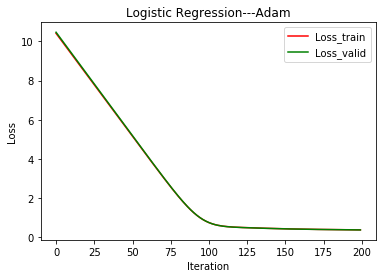

In [4]:
pic_title = "Logistic Regression---Adam"
loss_train, loss_valid = Adam(iterate_number, W, X_train, y_train, x_test, y_test, learning_rate)
plot(loss_train, loss_valid, pic_title)



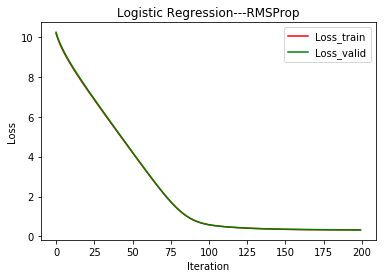

In [5]:
pic_title = "Logistic Regression---RMSProp"
loss_train, loss_valid = RMSProp(iterate_number, W, X_train, y_train, x_test, y_test, learning_rate)
plot(loss_train, loss_valid, pic_title)

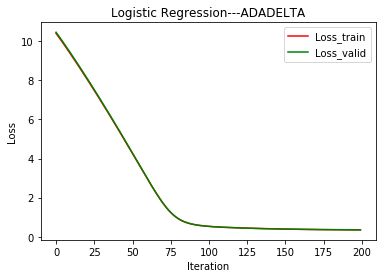

In [6]:
pic_title = "Logistic Regression---ADADELTA"
loss_train, loss_valid = ADADELTA(iterate_number, W, X_train, y_train, x_test, y_test)
plot(loss_train, loss_valid, pic_title)

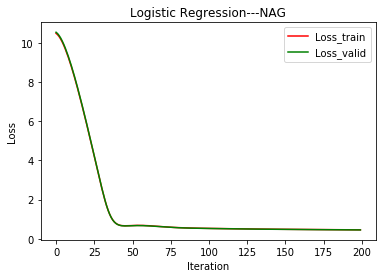

In [7]:
pic_title = "Logistic Regression---NAG"
loss_train, loss_valid = NAG(iterate_number, W, X_train, y_train, x_test, y_test, learning_rate)
plot(loss_train, loss_valid, pic_title)